In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
data = pd.read_csv('data.csv')

In [78]:
data.shape

(8693, 14)

In [80]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [82]:
numerical_data = data.copy().select_dtypes(include=[np.number])
categorical_data = data.copy().select_dtypes(include=[object, bool])

## Filling the NULL Values

In [87]:
# Filling HomePlanet, Cabin, Destination and Name with Unknown
data['HomePlanet']=data['HomePlanet'].fillna("Unknown")
data['Cabin']=data['Cabin'].fillna("Unknown")
data['Destination']=data['Destination'].fillna("Unknown")
data['Name']=data['Name'].fillna("Unknown")
#Filling Numerical columns with mean of particular column
data[numerical_data.columns]=data[numerical_data.columns].fillna(data[numerical_data.columns].mean())
#Filling Boolean values with false
data['CryoSleep']=data['CryoSleep'].fillna(False)
data['VIP']=data['VIP'].fillna(False)

In [88]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [95]:
categorical_data.describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


In [97]:
numerical_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [108]:

data['Total']=numerical_data.drop('Age',axis=1).sum(axis=1)
numerical_data['Total']=numerical_data.drop('Age',axis=1).sum(axis=1)

In [144]:
print(numerical_data.columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Total'],
      dtype='object')


In [93]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

## Numerical data

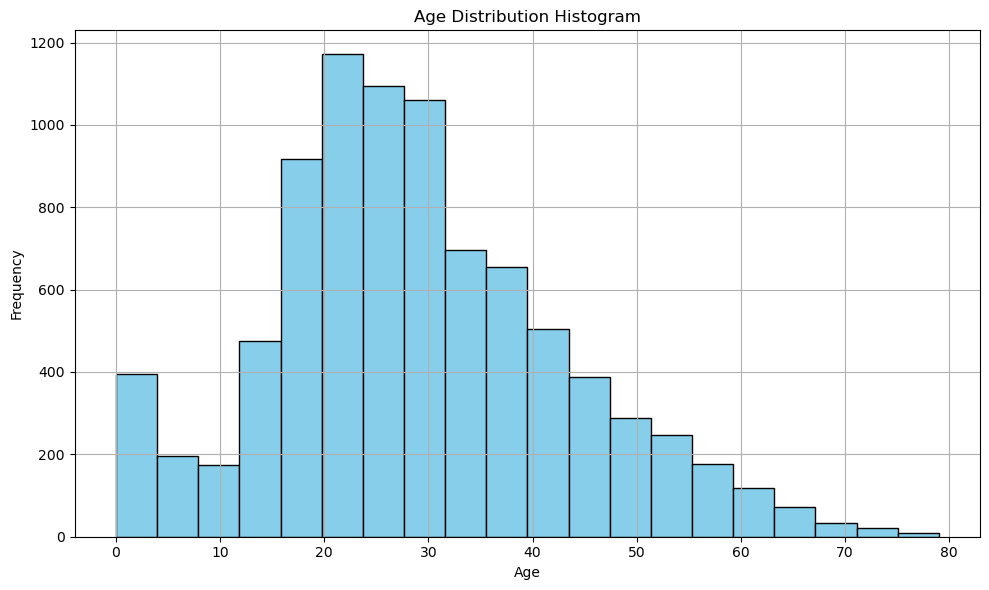

In [147]:
age_data = data['Age']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')

# Customize the plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

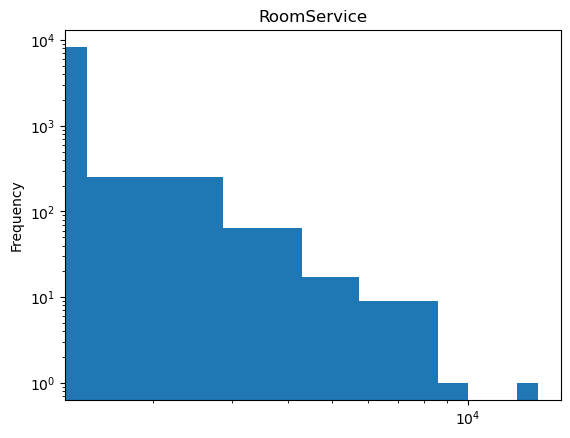

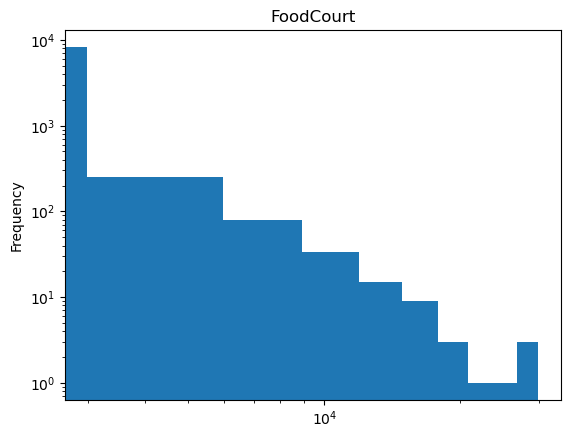

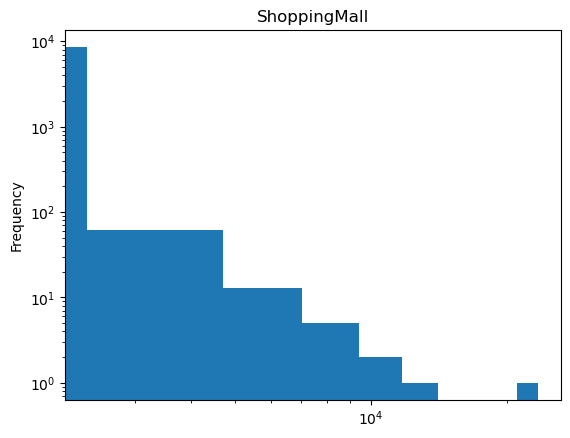

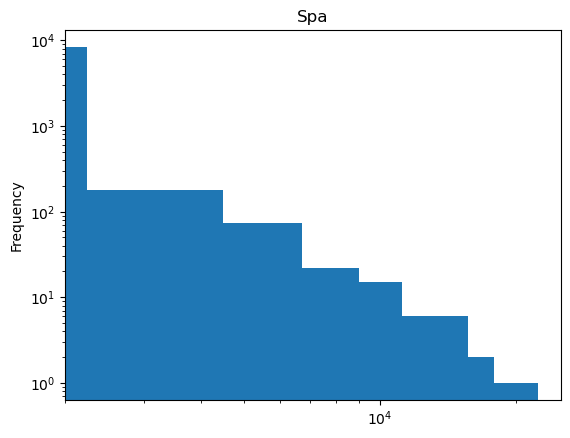

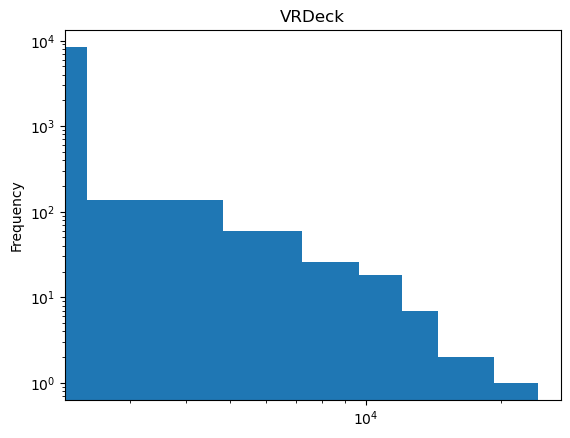

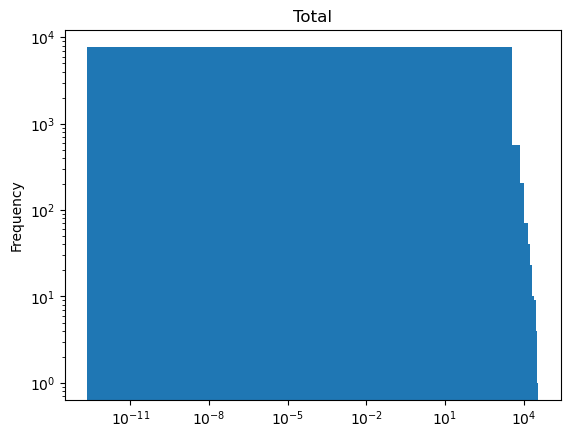

In [143]:
for col in numerical_data.drop(columns=['Age']).columns:
    data[col].plot.hist(logy=True,logx=True)
    plt.title(col)
    plt.show()

## Wealth

In [112]:
def plot_mean_spent_money_by_homeplanet(data):
    mean_spent_money_by_homeplanet = data.groupby('HomePlanet')['Total'].mean()

    plt.figure(figsize=(10, 6))
    mean_spent_money_by_homeplanet.plot(kind='bar', color='skyblue')
    
    plt.xlabel('HomePlanet')
    plt.ylabel('Mean Total Spent Money')
    plt.title('Mean Total Spent Money by HomePlanet')
    
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

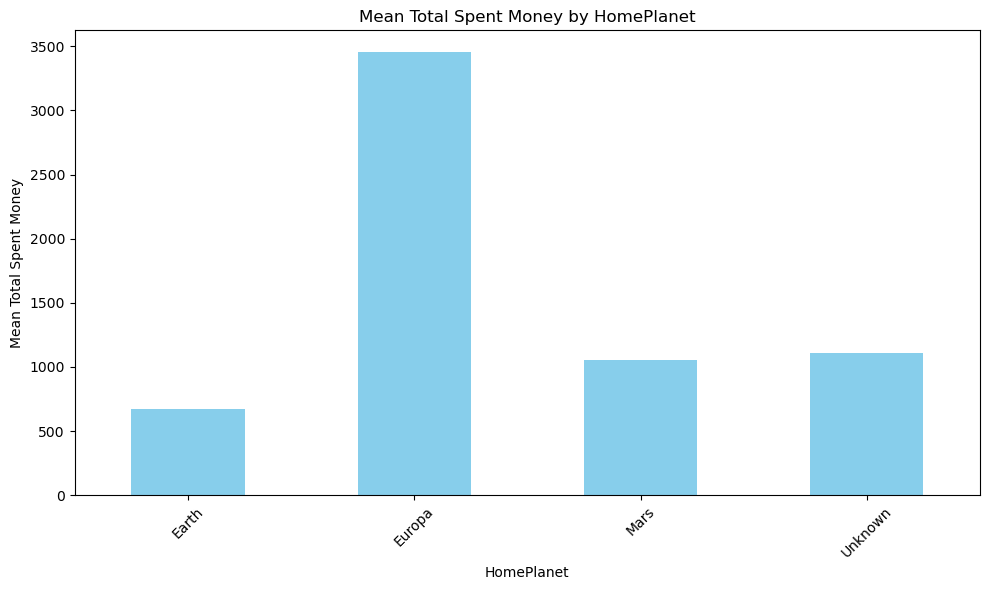

In [113]:
plot_mean_spent_money_by_homeplanet(data)

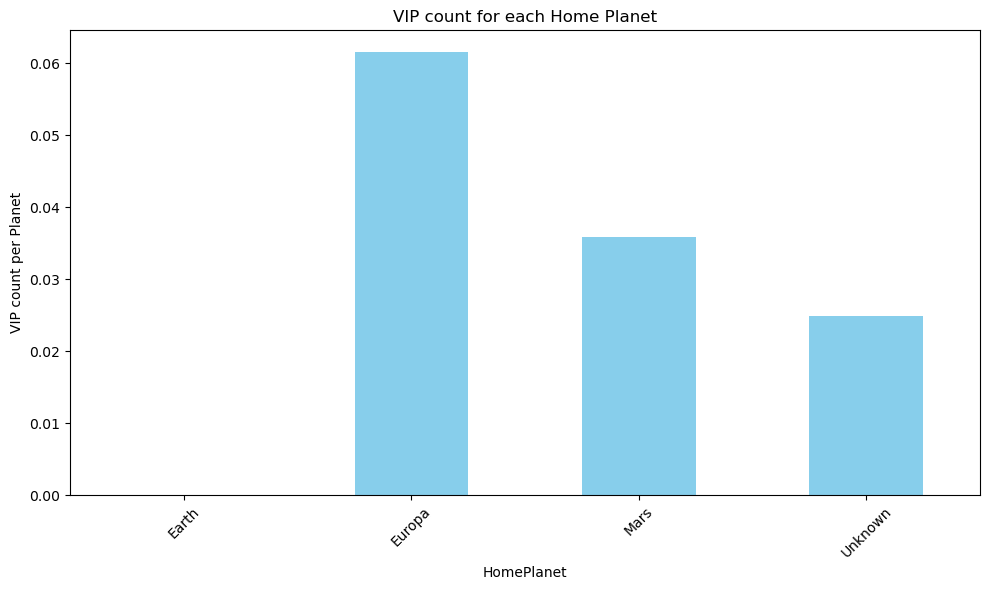

In [115]:
VIP_per_planet = data.groupby('HomePlanet')['VIP'].mean()

plt.figure(figsize=(10, 6))
VIP_per_planet.plot(kind='bar', color='skyblue')
    
plt.xlabel('HomePlanet')
plt.ylabel('VIP count per Planet')
plt.title('VIP count for each Home Planet')
    
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

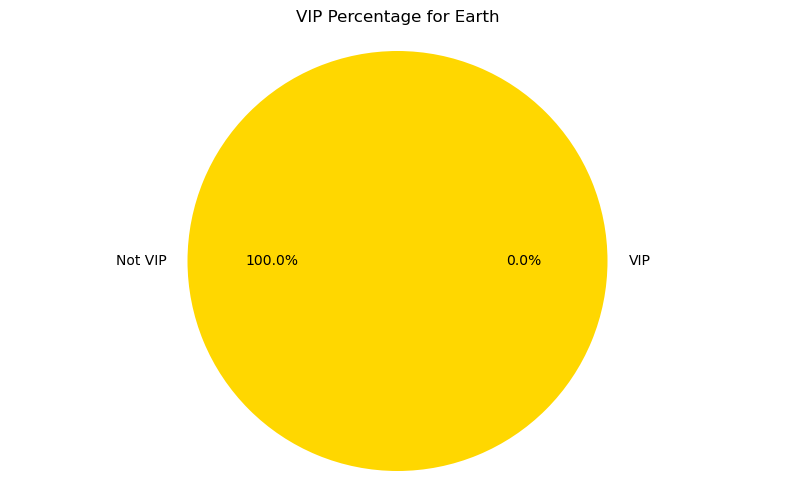

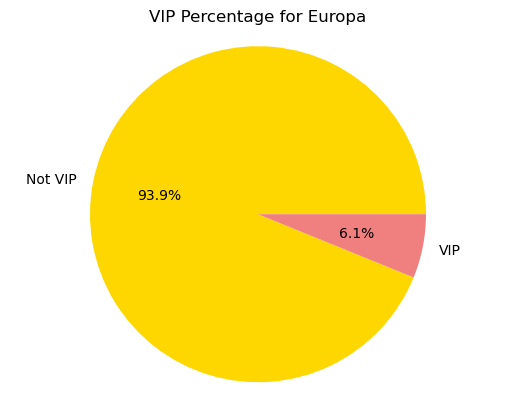

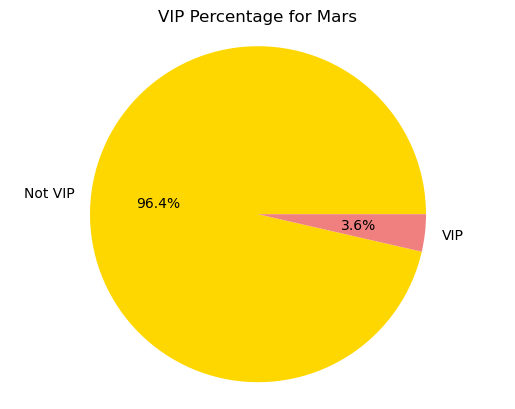

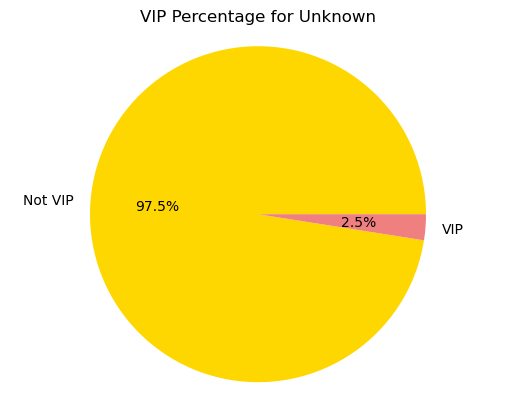

In [116]:
vip_percentage_by_homeplanet = data.groupby('HomePlanet')['VIP'].value_counts(normalize=True).unstack().fillna(0)

# Create a pie chart for each HomePlanet
plt.figure(figsize=(10, 6))
colors = ['gold', 'lightcoral']
    
for homeplanet in vip_percentage_by_homeplanet.index:
    plt.pie(vip_percentage_by_homeplanet.loc[homeplanet], labels=['Not VIP', 'VIP'], colors=colors, autopct='%1.1f%%')
    plt.title(f'VIP Percentage for {homeplanet}')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
    plt.show()

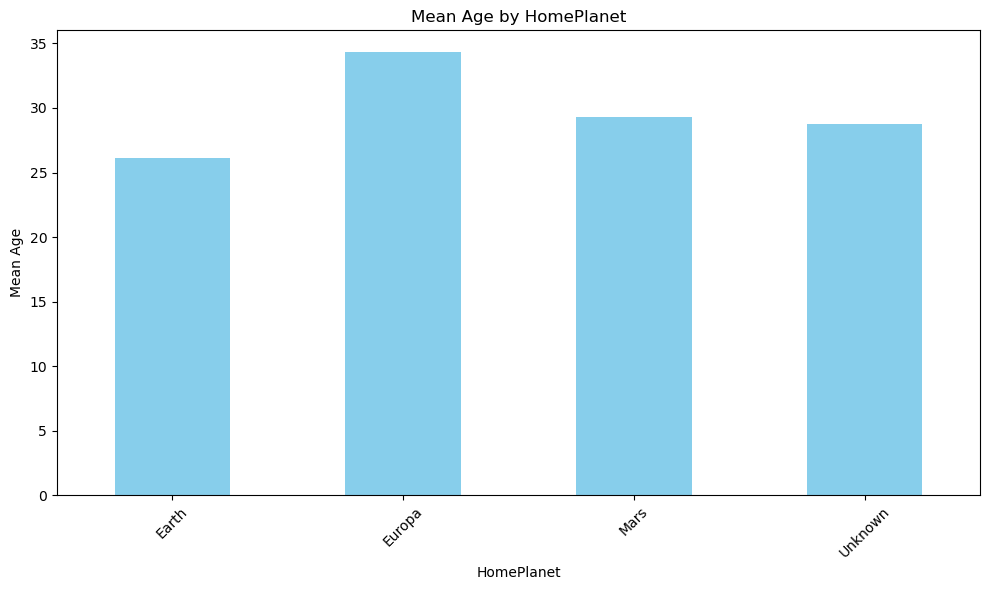

In [118]:
mean_age_by_homeplanet = data.groupby('HomePlanet')['Age'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_age_by_homeplanet.plot(kind='bar', color='skyblue')

# Customize the plot labels and title
plt.xlabel('HomePlanet')
plt.ylabel('Mean Age')
plt.title('Mean Age by HomePlanet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# From these graphs, it is clear that passengers from Europa are the wealthiest. They not only have the highest per-person spending but also the highest number of VIPs and VIP percantage. In contrast, Earth appears to be the least affluent among the three home planets, despite the fact that the majority of travelers originate from there.


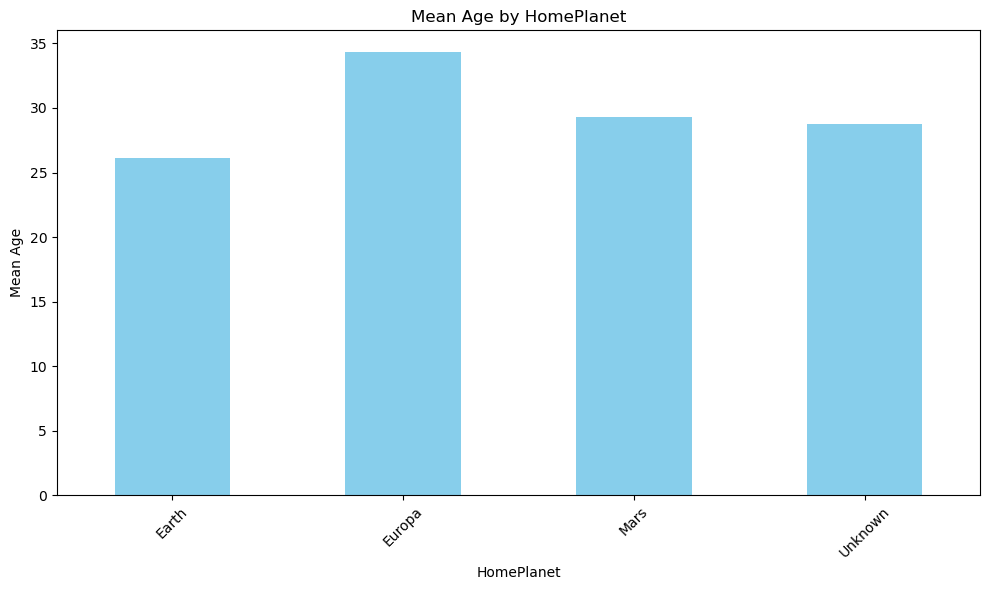

In [119]:
mean_age_by_homeplanet = data.groupby('HomePlanet')['Age'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_age_by_homeplanet.plot(kind='bar', color='skyblue')

# Customize the plot labels and title
plt.xlabel('HomePlanet')
plt.ylabel('Mean Age')
plt.title('Mean Age by HomePlanet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

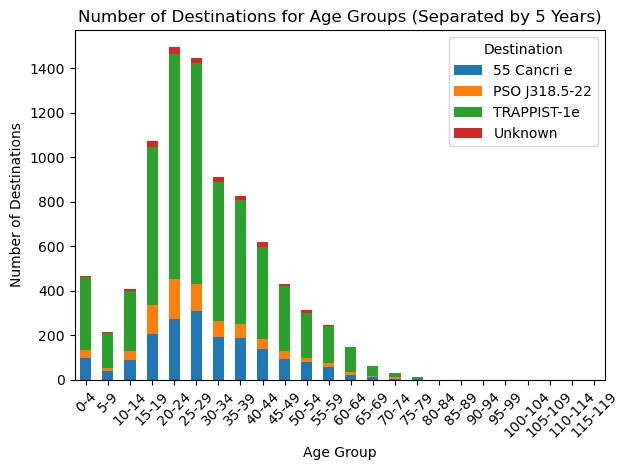

In [132]:
age_bins = list(range(0, 121, 5))
age_labels = [f"{age}-{age+4}" for age in age_bins[:-1]]

# Create a new column in the DataFrame to represent the age compartments
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by 'AgeGroup' and 'Destination' and count the number of destinations for each combination
destination_counts = data.groupby(['AgeGroup', 'Destination']).size().unstack().fillna(0)

# Create a bar plot
plt.figure(figsize=(12, 6))
destination_counts.plot(kind='bar', stacked=True)

# Customize the plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Destinations')
plt.title('Number of Destinations for Age Groups (Separated by 5 Years)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.legend(title='Destination', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1200x800 with 0 Axes>

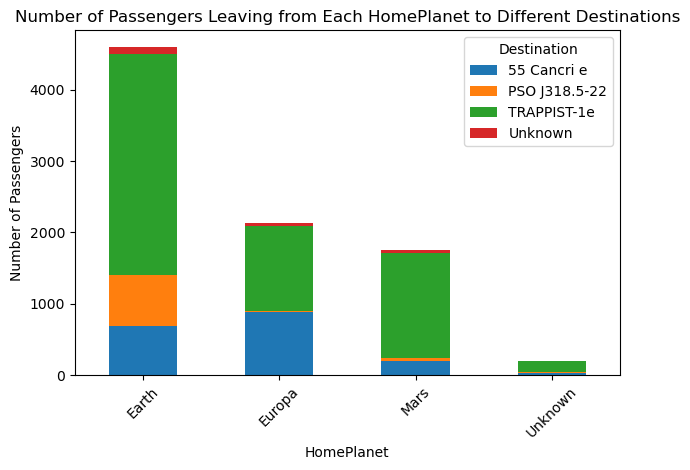

In [121]:
passenger_counts = data.groupby(['HomePlanet', 'Destination']).size().unstack().fillna(0)

# Create a bar plot
plt.figure(figsize=(12, 8))
passenger_counts.plot(kind='bar', stacked=True)

# Customize the plot labels and title
plt.xlabel('HomePlanet')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Leaving from Each HomePlanet to Different Destinations')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.legend(title='Destination', bbox_to_anchor=(1, 1))
plt.show()

# These two graphs provide compelling evidence supporting our claim. The first graph illustrates that the mean age of passengers departing from Earth is the lowest, while passengers originating from Europa have the highest average age. Furthermore, the second graph reveals that the largest number of passengers have Earth as their home planet. Notably, the data shows a noteworthy trend - the majority of passengers with the destination 'PSO' originate from Earth, highlighting an intriguing pattern in passenger origins.

## This data suggests a possible scenario where Earth, in the future, might resemble a less economically developed region, prompting its younger residents to seek better opportunities abroad, with planet PSO emerging as an appealing destination for these aspirations.

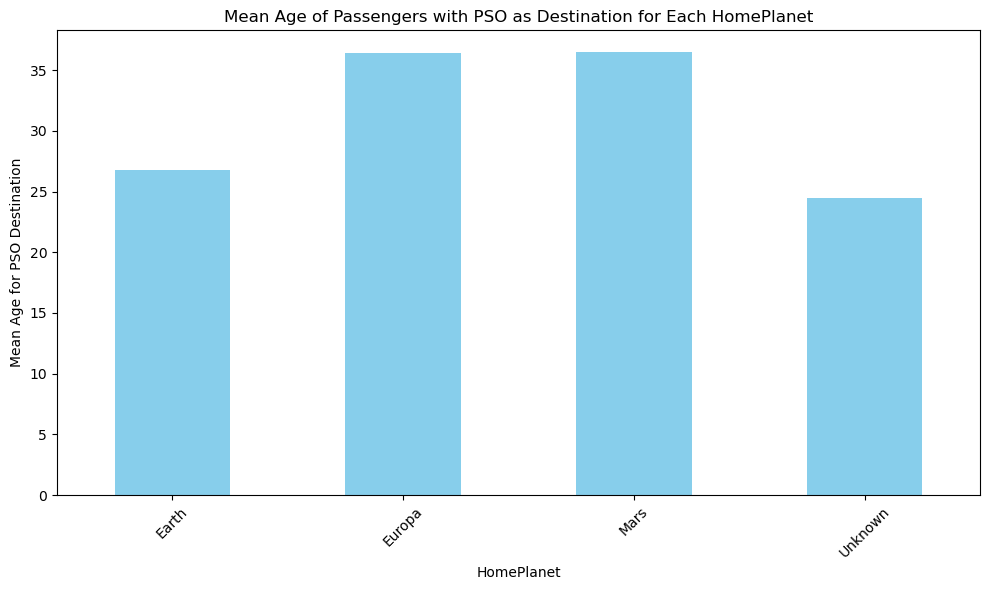

In [151]:
pso_passengers = data[data['Destination'] == 'PSO J318.5-22']

# Group the filtered data by 'HomePlanet' and calculate the mean age for each group
mean_age_by_homeplanet = pso_passengers.groupby('HomePlanet')['Age'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_age_by_homeplanet.plot(kind='bar', color='skyblue')

# Customize the plot labels and title
plt.xlabel('HomePlanet')
plt.ylabel('Mean Age for PSO Destination')
plt.title('Mean Age of Passengers with PSO as Destination for Each HomePlanet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### CryoSleep

<Figure size 1200x800 with 0 Axes>

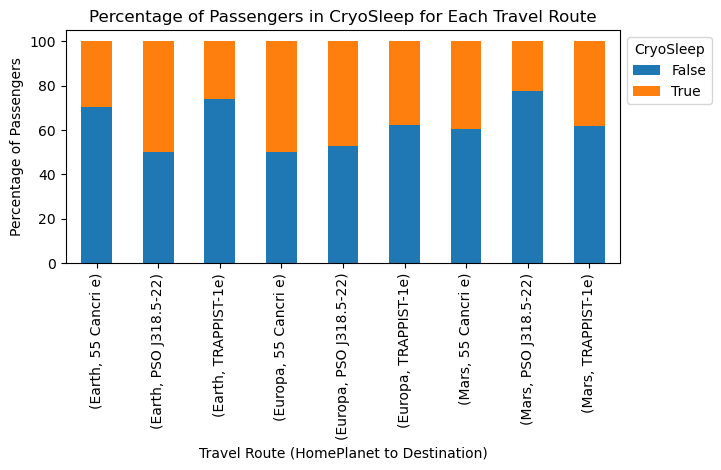

In [125]:
filtered_df = data[(data['HomePlanet'] != 'Unknown') & (data['Destination'] != 'Unknown')]

# Group the filtered data by 'HomePlanet', 'Destination', and 'CryoSleep' and calculate the percentage of passengers for each combination
passenger_percentages = filtered_df.groupby(['HomePlanet', 'Destination', 'CryoSleep']).size().unstack(fill_value=0)
passenger_percentages = passenger_percentages.div(passenger_percentages.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
passenger_percentages.plot(kind='bar', stacked=True)

# Customize the plot labels and title
plt.xlabel('Travel Route (HomePlanet to Destination)')
plt.ylabel('Percentage of Passengers')
plt.title('Percentage of Passengers in CryoSleep for Each Travel Route')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.legend(title='CryoSleep', bbox_to_anchor=(1, 1))
plt.show()

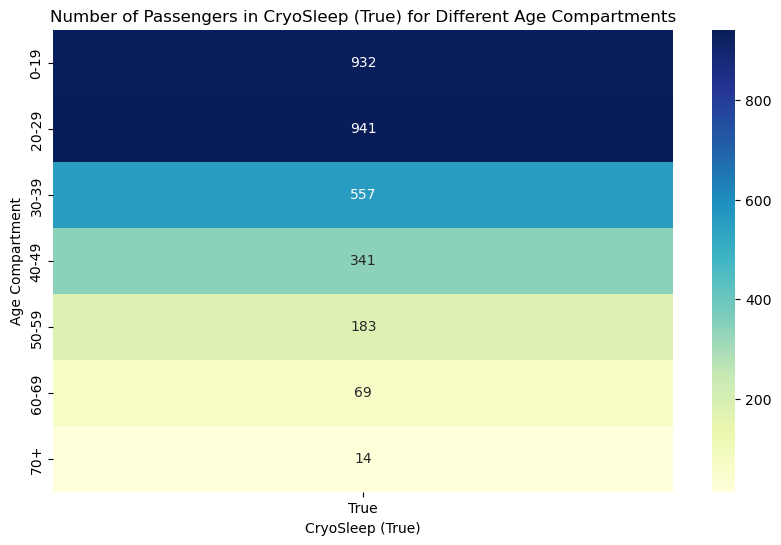

In [128]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 120]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new column in the DataFrame to represent the age compartments
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Filter the data to consider only passengers in CryoSleep (True)
cryo_true_df = data[data['CryoSleep'] == True]

# Create a pivot table to count the number of passengers in each age compartment
heatmap_data = cryo_true_df.pivot_table(index='AgeGroup', columns='CryoSleep', values='Age', aggfunc='count')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')

# Customize the plot labels and title
plt.xlabel('CryoSleep (True)')
plt.ylabel('Age Compartment')
plt.title('Number of Passengers in CryoSleep (True) for Different Age Compartments')

plt.show()

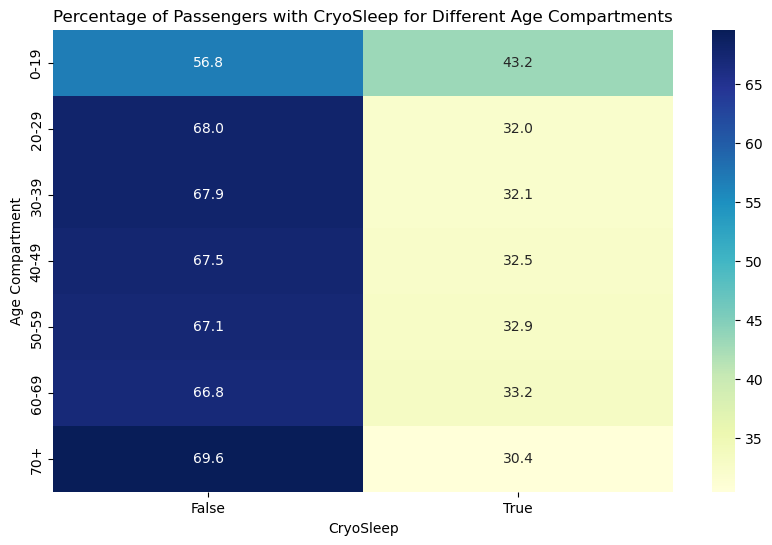

In [131]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 120]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new column in the DataFrame to represent the age compartments
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the percentage of passengers with CryoSleep set to True for each age compartment
percentage_data = data.groupby('AgeGroup')['CryoSleep'].value_counts(normalize=True).unstack().fillna(0) * 100

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_data, annot=True, fmt='.1f', cmap='YlGnBu')

# Customize the plot labels and title
plt.xlabel('CryoSleep')
plt.ylabel('Age Compartment')
plt.title('Percentage of Passengers with CryoSleep for Different Age Compartments')

plt.show()

# It's intriguing to note that a relatively small number of passengers on each route opt for cryosleep, and this preference appears to diminish with age. Considering that the Space Titanic travels at or near the speed of light, the journey would still span roughly 40 years to reach PSO and 55 Cancri, and approximately 80 years to reach TRAPPIST. This implies that unless there are advancements in faster-than-light travel or significant extensions of human lifespan, the majority of passengers may either be elderly or no longer with us by the time they reach their intended destinations.

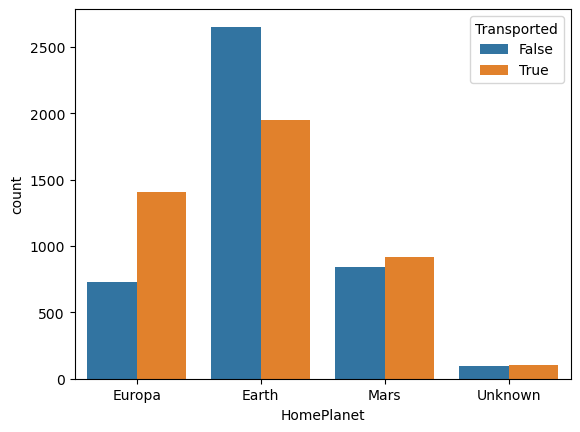

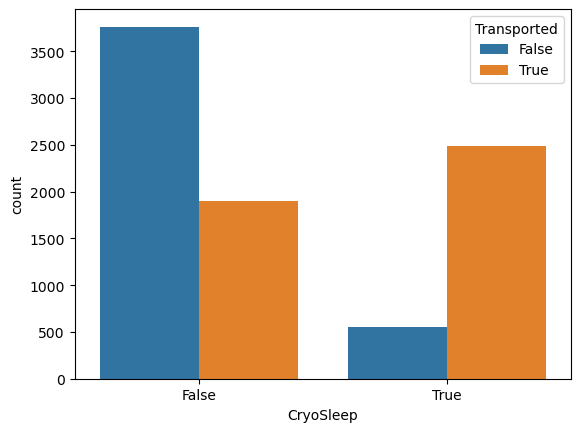

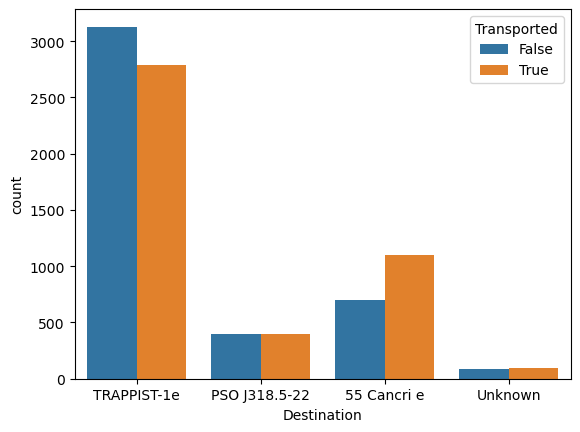

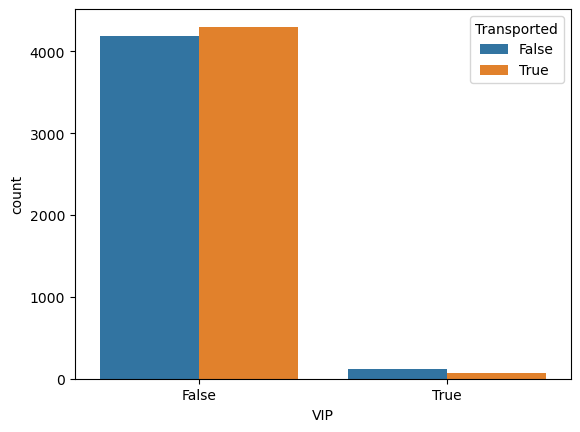

In [137]:
for col in categorical_data.drop(columns=['PassengerId','Cabin','Name','Transported']).columns:
    sns.countplot(data=data.dropna(), x=col, hue='Transported')
    plt.show()

# It appears that among the various variables, only two significantly influence the likelihood of being transported: Home Planet and CryoSleep. Passengers from Europa who opt for CryoSleep have the highest probability of being transported, while passengers from Earth who do not choose CryoSleep have the lowest chances of being transported.